# Ploting clustering metrics.

Printing clusters from a run on the following JSON files : 
* `clusters.json`: Cluster assignments of the clients per round of FL
* `distribution.json`: Initial participants distribution that clustering should ideally reproduce. 

To dynamically produce plot labels depending on the clustering parameters the following keys are extracted from the hydra configuration file : 
* `strategy.clustering_metric` : The metric used for clusteing, e.g. accuracy, f1_score, loss, ...
* `strategy.reputation_metric` : The metric used for reputation, used since it has an incidence on the clustering results, it is expresed as an indication.
* `strategy.clustering_kwargs.distance_type` : Distance used : cosin similarity, L2_Norm
* `strategy.clustering_kwargs.threshold_type` : Distance threshold for hierarchical clustering, e.g. mean, mean_iterative, fixed, ... 

Those keys are obtained by parsing the following yaml file :
* `.hydra/config.yaml` : 

In [1]:
from trustfids.utils.plot_cluster import *

# Targeted

## Targeted, attacker separated from the benign ? 
No, in **all cases** (lone, colluding in minority, majority but also at each percentage of poisoning)  attackers are grouped with benign. 

### Lone

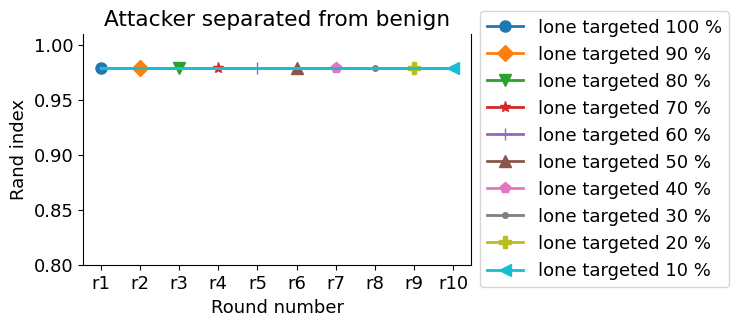

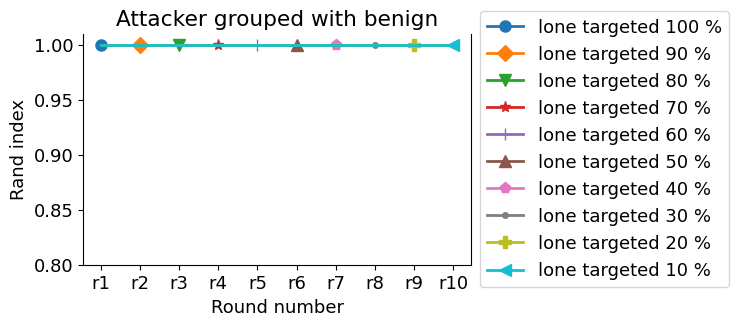

In [2]:
from trustfids.utils.plot_cluster import *

paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0][::-1]:
    paths.append(f"./trustfids/lone/targeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

### Colluding in minority

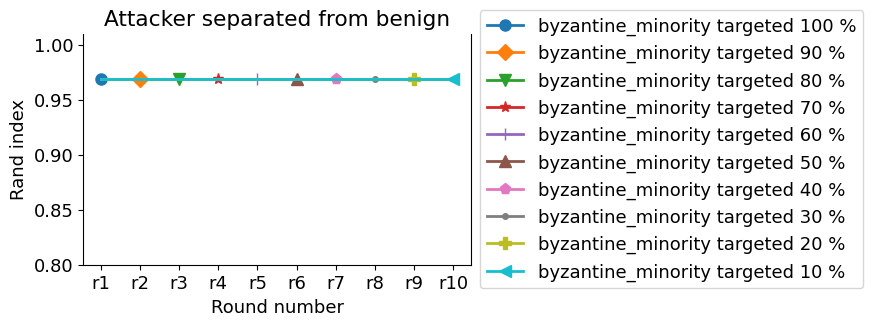

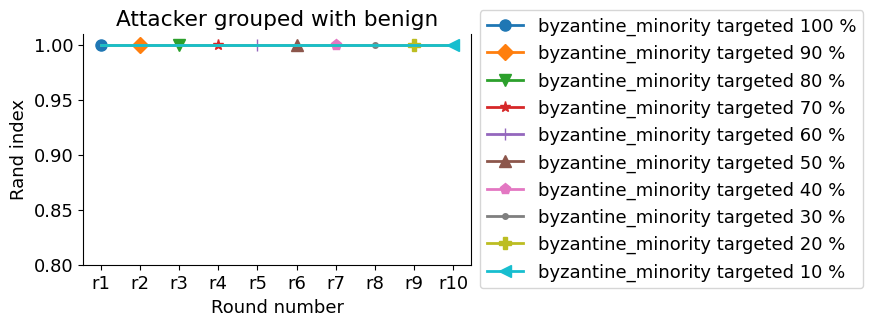

In [3]:
paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0][::-1]:
    paths.append(f"./trustfids/sybils_min/targeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

### Colluding in majority 

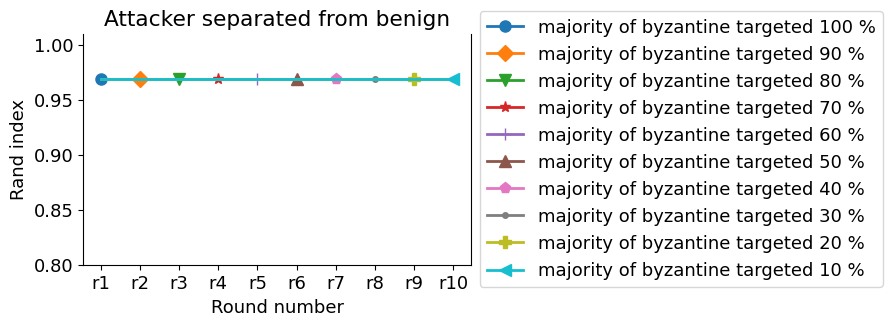

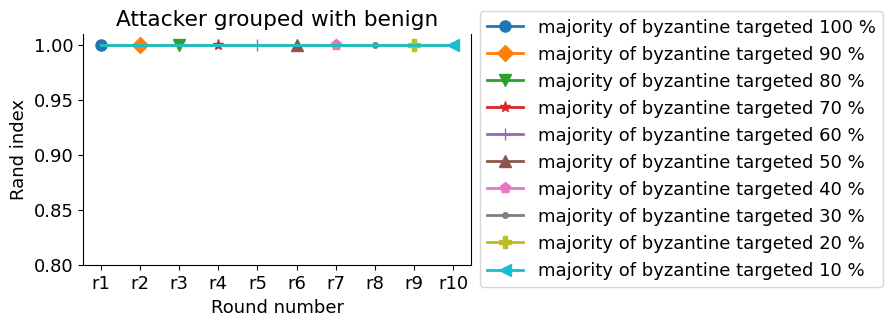

In [4]:
paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0][::-1]:
    paths.append(f"./trustfids/sybils/targeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

# Untargeted

## Attacker separated from the benign ? 
For all three distribution of attackers (lone, byzantine in minority, byzantine in majority) the conclusions are the same : 

- The attacker and the benign participants are most of the time grouped together in the same cluster. 

- This cease to be true somewhere between 80% and 100% of poisoinning : at 100% poisonning (loud scenario) the attacker and benign participants are separated. 

- At 95% poisonning sybils and sybils_min are separated, lone attacker are at first grouped with benign but end being separated after some round. 

- The clustering is constant for all 10 rounds in all cases. 

### Lone

Takeaways : 
- The attacker and the benign participants are most of the time grouped together in the same cluster. 

- This cease to be true somewhere between 80% and 100% of poisoinning : at 100% poisonning (loud scenario) the attacker and benign participants are separated. At 95% poisonning attacker and participants are first grouped together but they end up separated.

- Except for the 95% case, the clustering is constant on all round. 

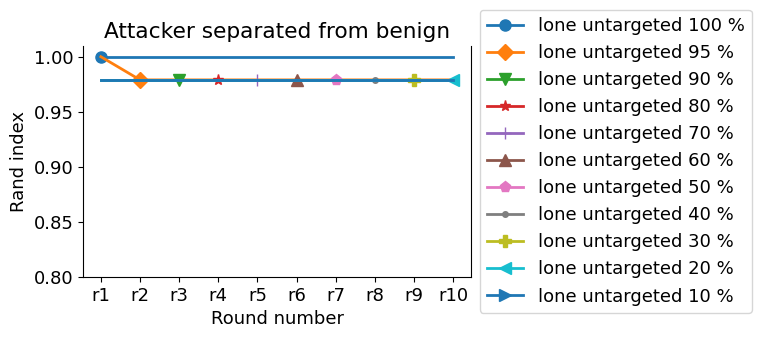

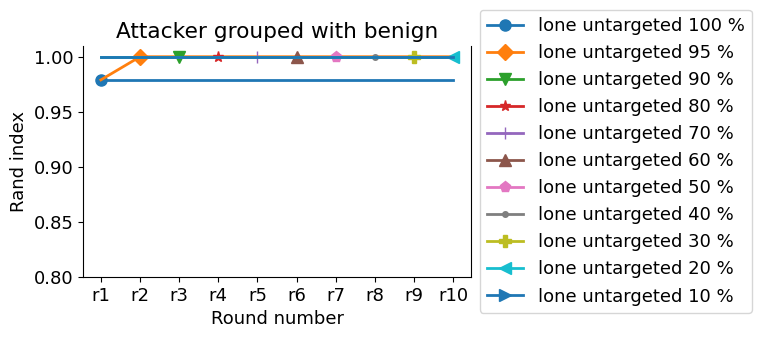

In [10]:
paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1.0][::-1]:
    paths.append(f"./trustfids/lone/untargeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

### Colluding in minority 

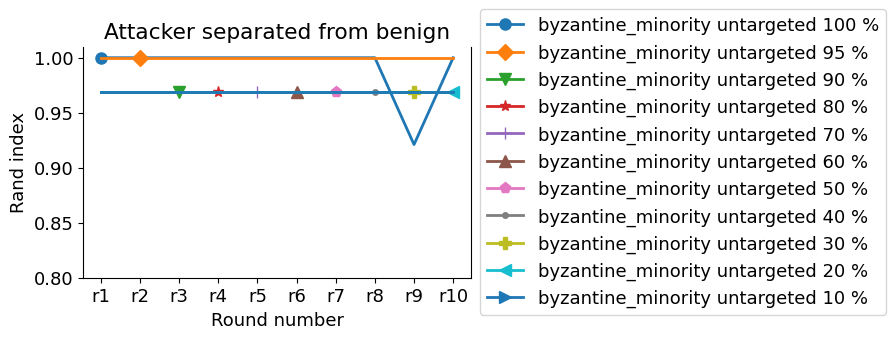

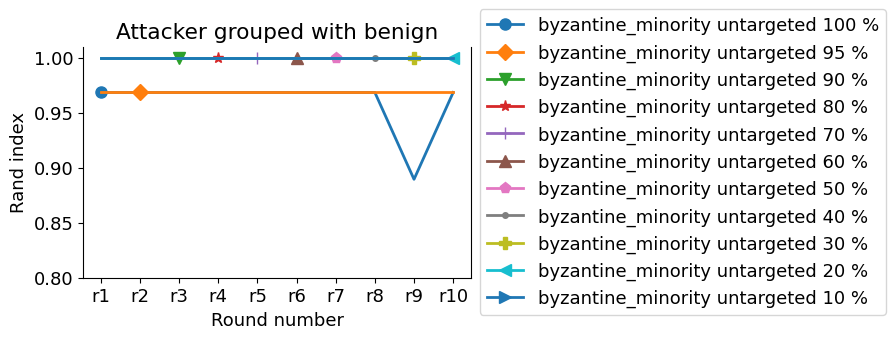

In [18]:
paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1.0][::-1]:
    paths.append(f"./trustfids/sybils_min/untargeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

### colluding in majority

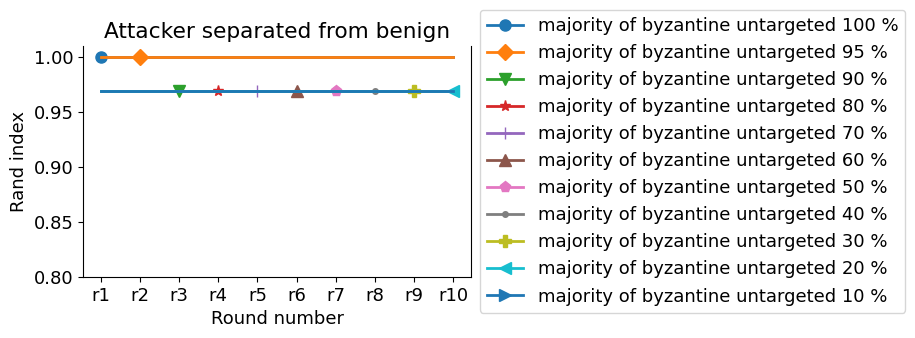

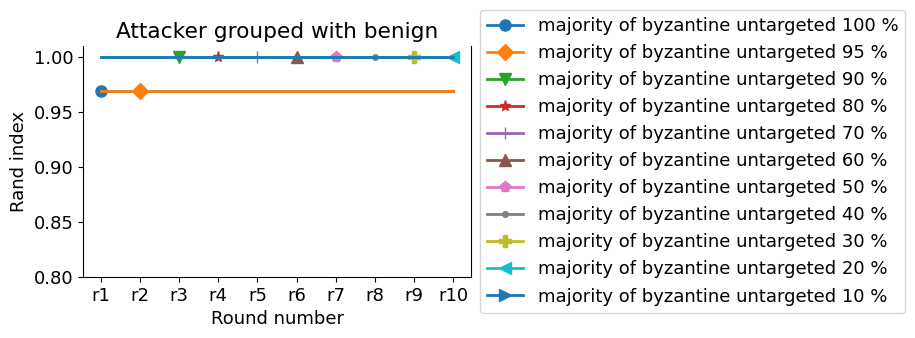

In [16]:
paths = []
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1.0][::-1]:
    paths.append(f"./trustfids/sybils/untargeted/{p}")
label_args = {
    "legacy_label": False,
    "distribution_label":  True,
    "target_label":True,
    "percent_poisoning_label":True,
}
plot_rand_comparison(*paths, title="Attacker separated from benign",split_attacker=True, label_args=label_args, legend_out=True)
plot_rand_comparison(*paths, title="Attacker grouped with benign",split_attacker=False, label_args=label_args , legend_out=True)

# Archive

### Exclude attackers from comparison

In this first batch of comparison attackers are excluded from both partition of the partiticipants.

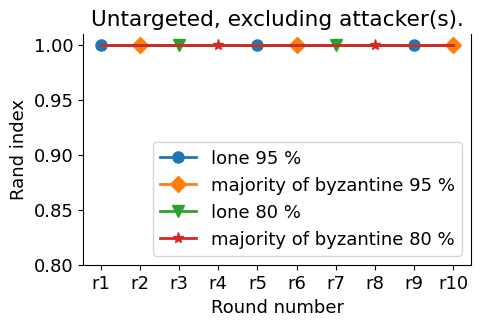

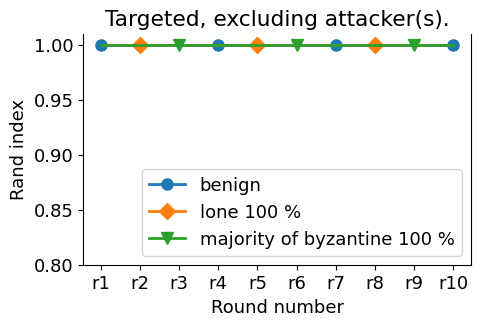

In [ ]:
paths = []
for p in [0.8,0.95][::-1]:
    paths.append(f"./clustering/untargeted_effect/lone/{p}")
    paths.append(f"./clustering/untargeted_effect/sybils/{p}")

label_args={"distribution_label":True, "percent_poisoning_label":True}
plot_rand_comparison(*paths, out_path="./figures/clustering/untargeted_rand_no_attacker.pdf", title="Untargeted, excluding attacker(s).",no_attackers=True, label_args = label_args)

paths = []
paths.append(f"./trustfids/benign/")
paths.append("./trustfids/lone/targeted/loud")
paths.append("./trustfids/sybils/targeted/loud")
label_args={"distribution_label":True, "percent_poisoning_label":True}
plot_rand_comparison(*paths, out_path="./figures/clustering/targeted_rand_no_attackers.pdf", title="Targeted, excluding attacker(s).",no_attackers=True,  label_args = label_args)

## Attackers separated from benign.

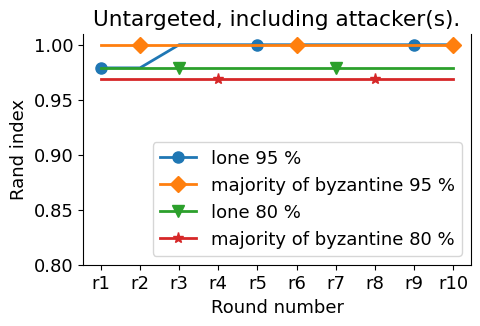

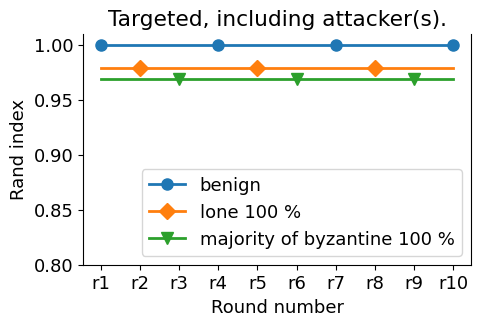

In [ ]:
paths = []
for p in [0.8,0.95][::-1]:
    paths.append(f"./clustering/untargeted_effect/lone/{p}")
    paths.append(f"./clustering/untargeted_effect/sybils/{p}")

label_args={"distribution_label":True, "percent_poisoning_label":True}
plot_rand_comparison(*paths, out_path="./figures/clustering/untargeted_rand_attackers_separated.pdf", title="Untargeted, including attacker(s).",split_attacker=True, label_args = label_args)


paths = []
paths.append(f"./trustfids/benign/")
paths.append("./trustfids/lone/targeted/loud")
paths.append("./trustfids/sybils/targeted/loud")
label_args={"distribution_label":True, "percent_poisoning_label":True}
plot_rand_comparison(*paths, out_path="./figures/clustering/targeted_rand_attackers_separated.pdf", title="Targeted, including attacker(s).",split_attacker=True,  label_args = label_args)


#### 10% poisonning

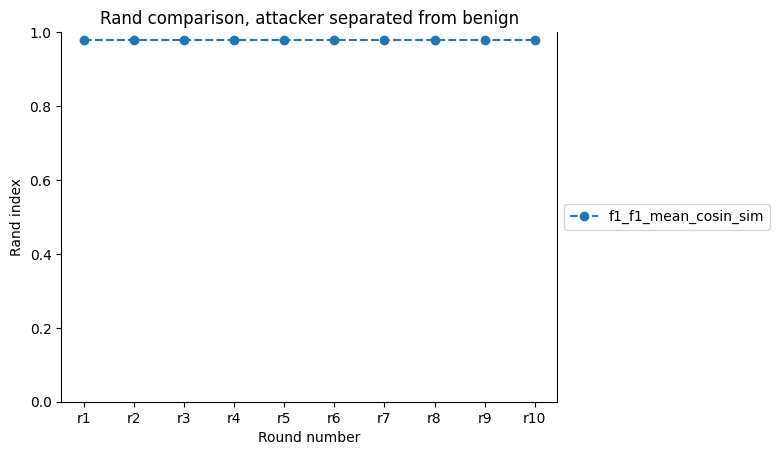

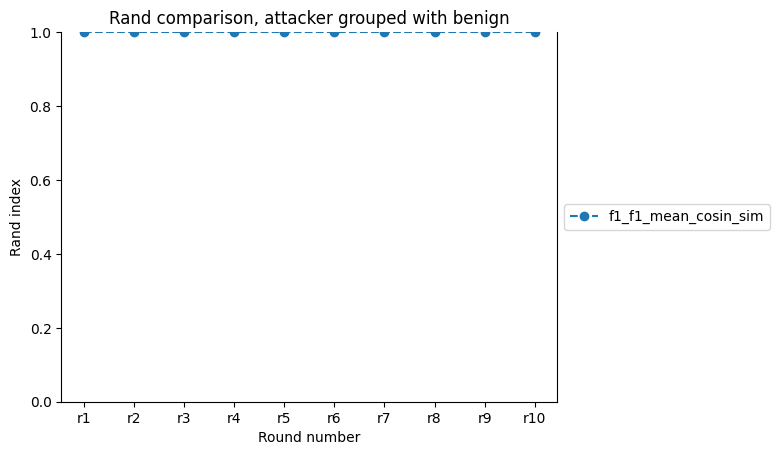

In [ ]:
#Untargeted

plot_rand_comparison("./clustering/untargeted_effect/lone/0.1", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/0.1", title="Rand comparison, attacker grouped with benign",split_attacker=False)


#### 40% poisonning

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/lone/0.4", title="Rand comparison, attacker separated from benign",split_attacker=True, percent_poisoning=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/0.4", title="Rand comparison, attacker grouped with benign",split_attacker=False)

TypeError: plot_rand_comparison() got an unexpected keyword argument 'percent_poisoning'

#### 60% poisonning

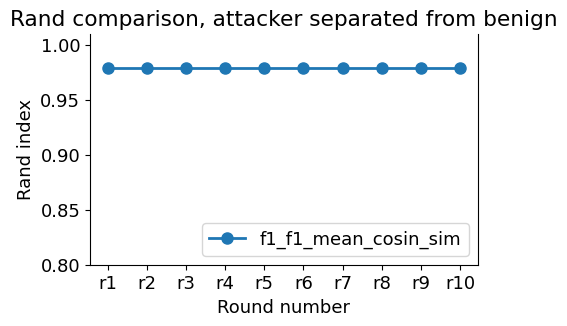

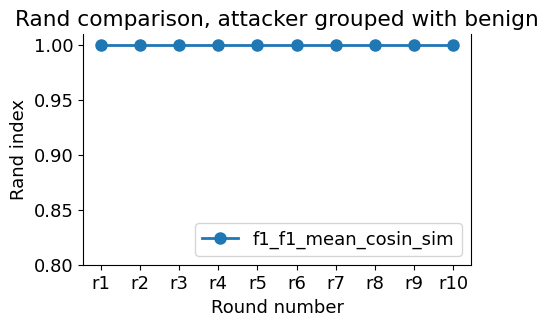

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/lone/0.6", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/0.6", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 80% poisonning

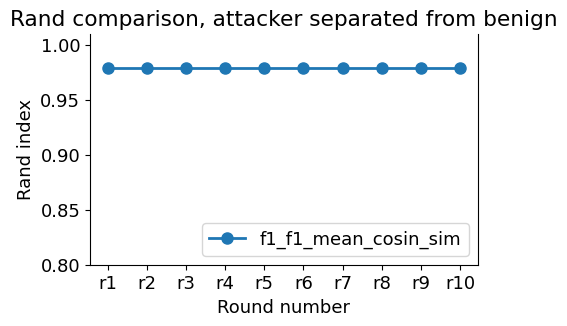

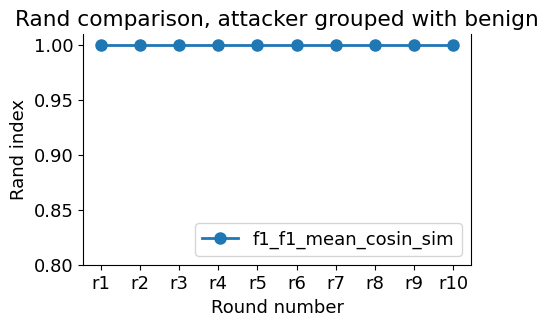

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/lone/0.8", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/0.8", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 95 % poisonning

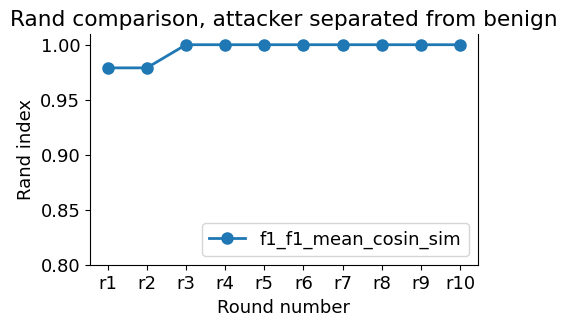

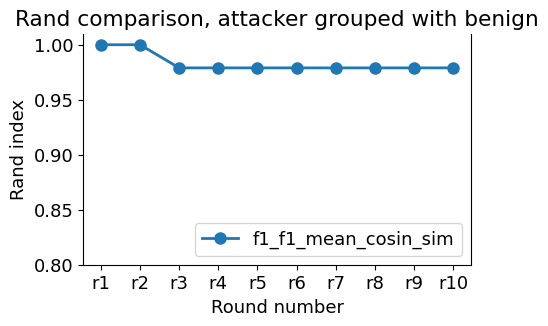

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/lone/0.95", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/0.95", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 100% poisonning

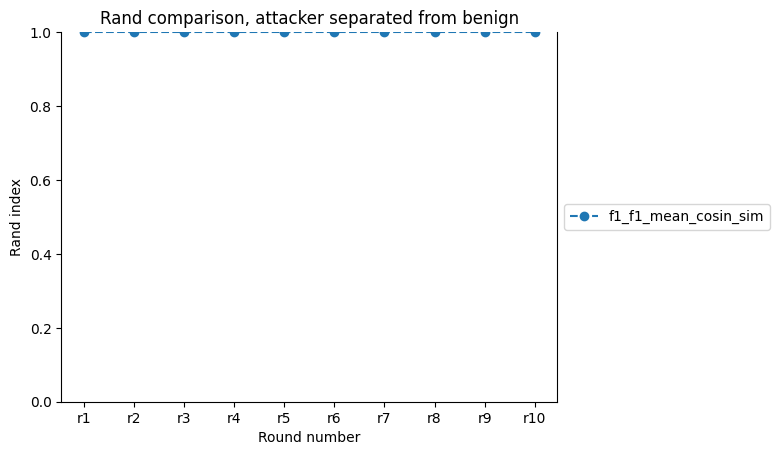

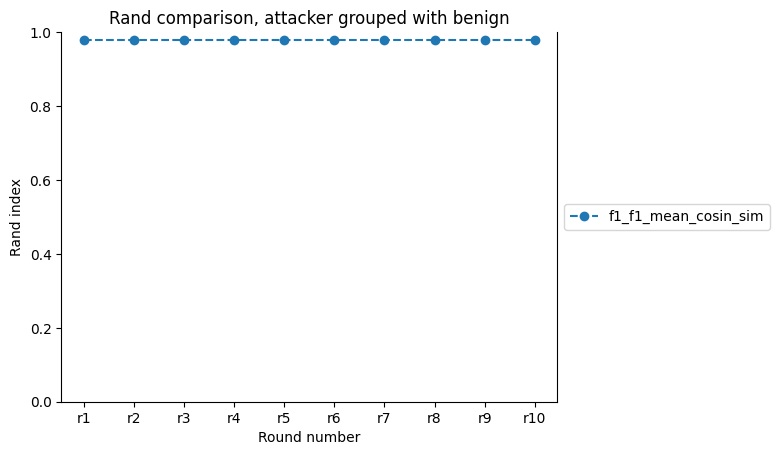

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/lone/1.0", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/lone/1.0", title="Rand comparison, attacker grouped with benign",split_attacker=False)

### Sybils_min 

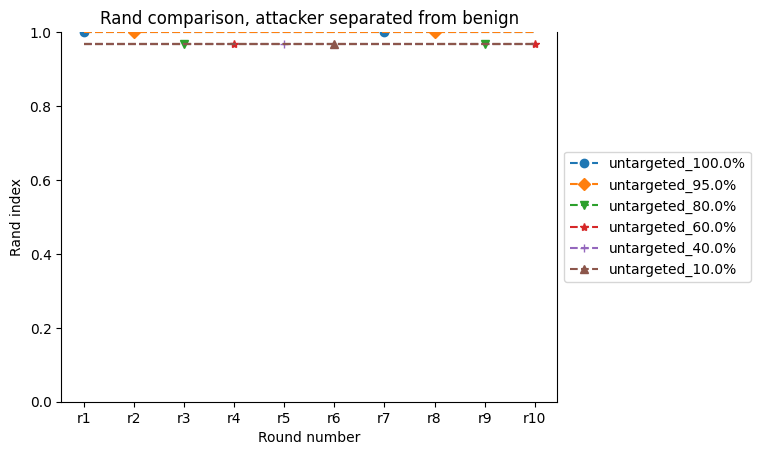

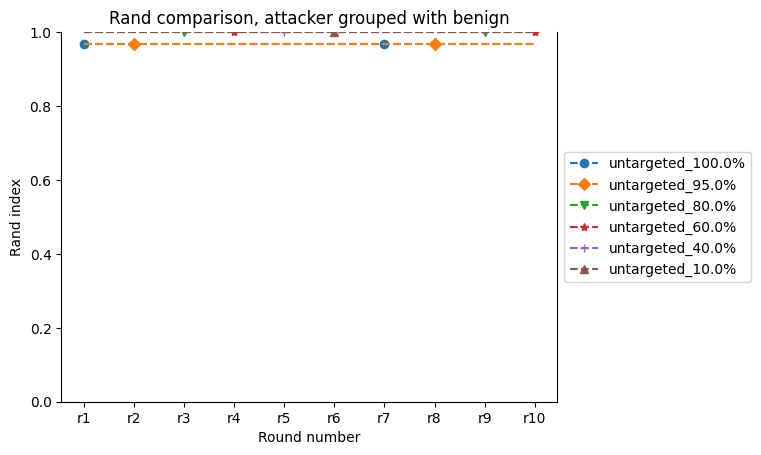

In [ ]:
paths = []
for p in [0.1,0.4,0.6,0.8,0.95,1.0][::-1]:
    paths.append(f"./clustering/untargeted_effect/sybils_min/{p}")

plot_rand_comparison(*paths, title="Rand comparison, attacker separated from benign",split_attacker=True, percent_poisoning= True)
plot_rand_comparison(*paths, title="Rand comparison, attacker grouped with benign",split_attacker=False, percent_poisoning= True)

#### 10% poisonning

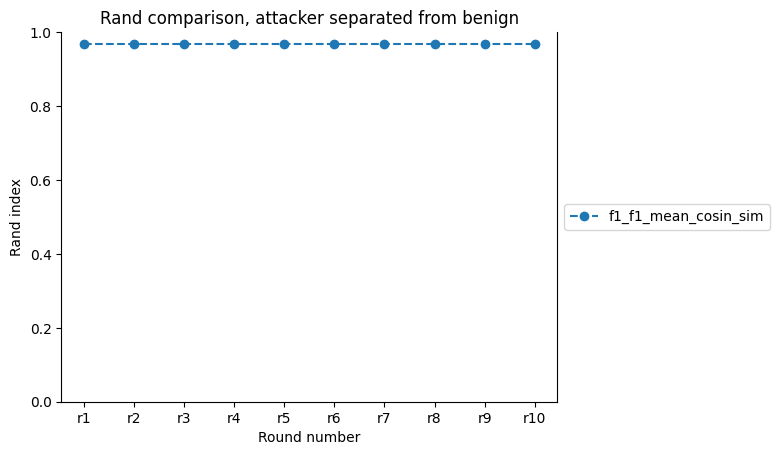

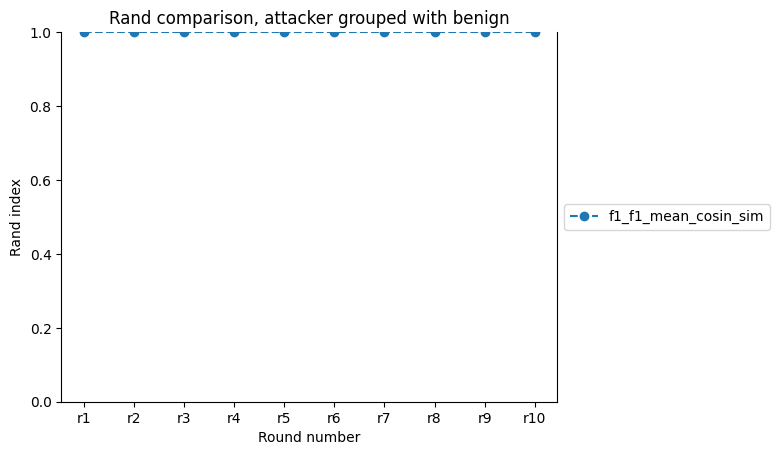

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.1", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.1", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 40% poisonning

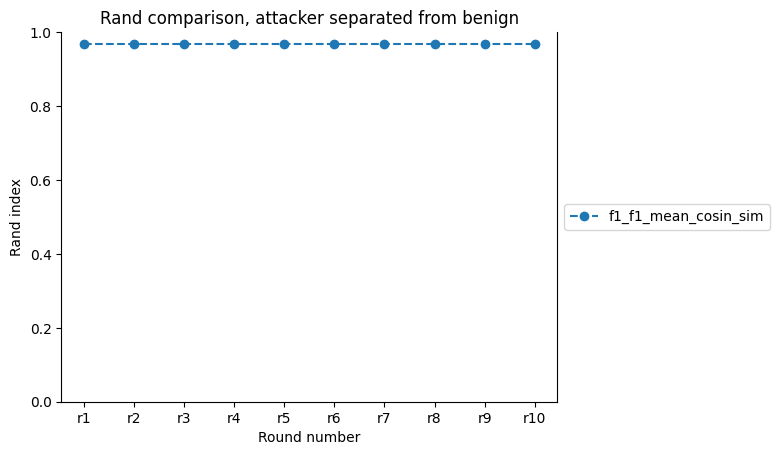

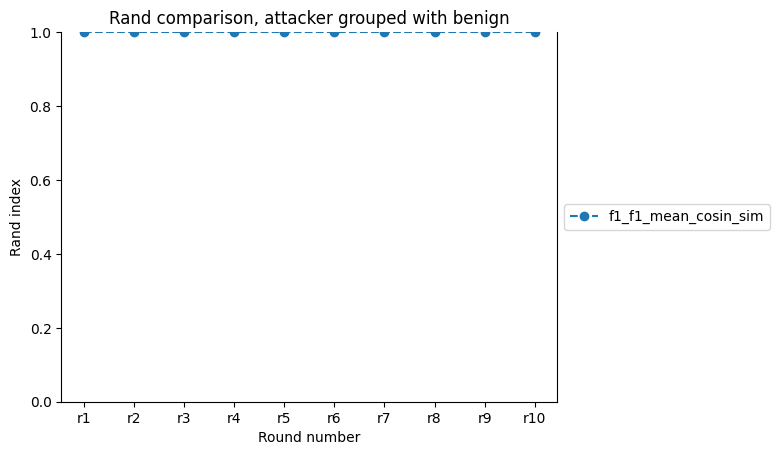

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.4", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.4", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 60% poisonning

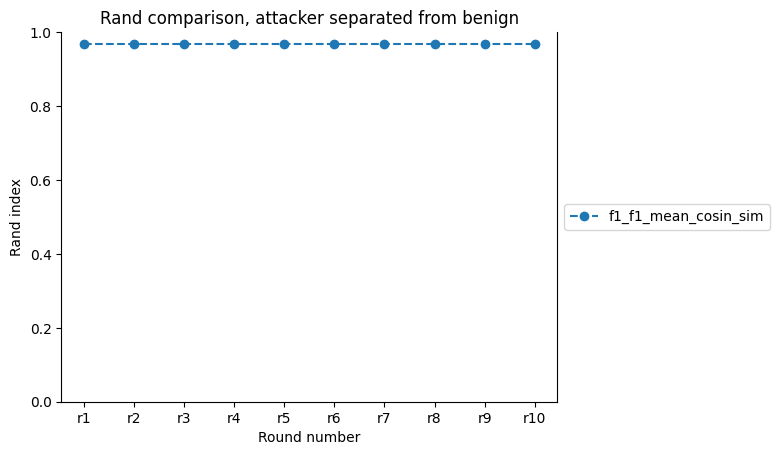

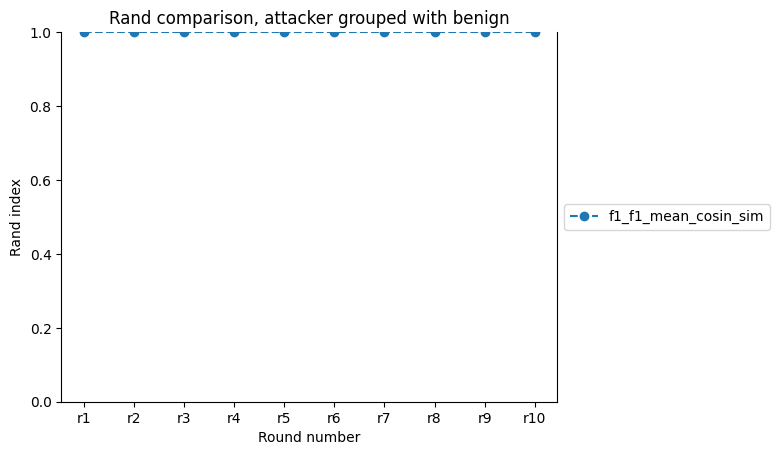

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.6", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.6", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 80% poisonning

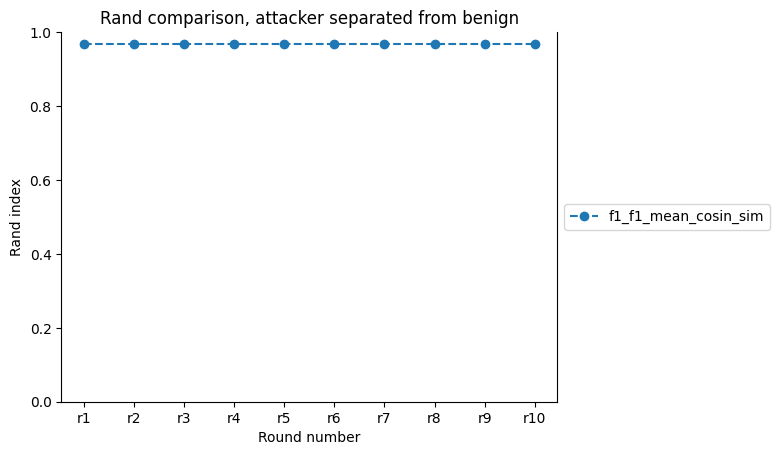

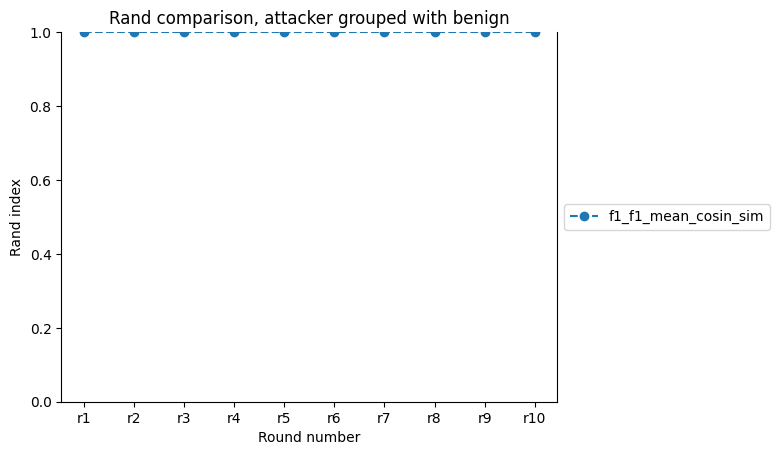

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.8", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.8", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 95% poisonning 

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.95", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/0.95", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 100% poisonning

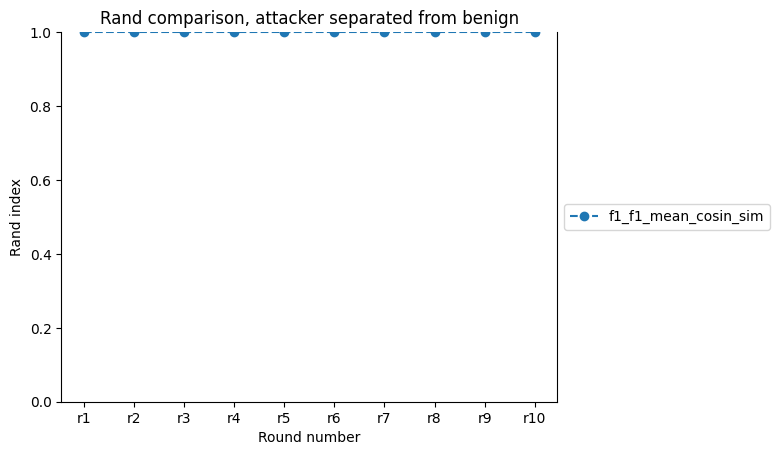

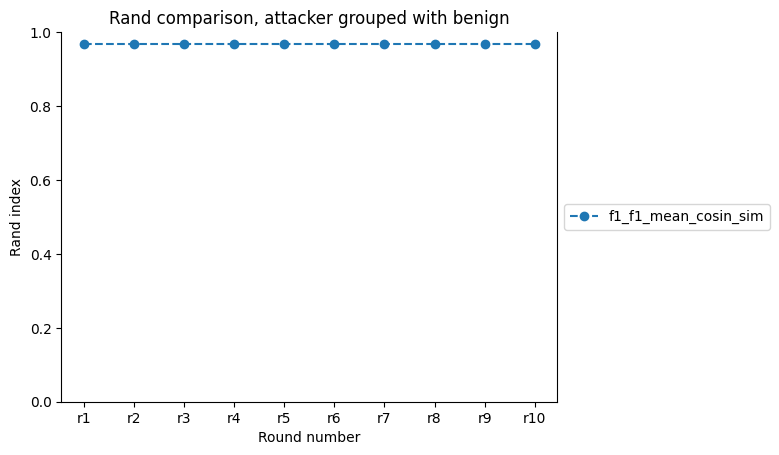

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/1.0", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils_min/1.0", title="Rand comparison, attacker grouped with benign",split_attacker=False)

### Sybils

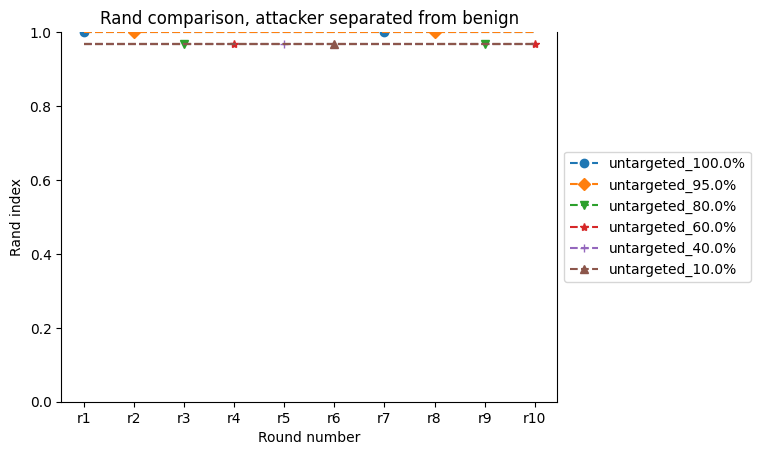

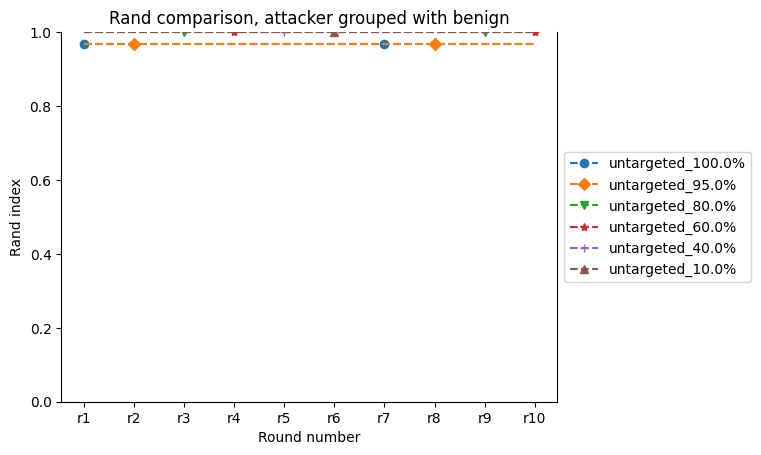

In [ ]:
paths = []
for p in [0.1,0.4,0.6,0.8,0.95,1.0][::-1]:
    paths.append(f"./clustering/untargeted_effect/sybils_min/{p}")

plot_rand_comparison(*paths, title="Rand comparison, attacker separated from benign",split_attacker=True, percent_poisoning= True)
plot_rand_comparison(*paths, title="Rand comparison, attacker grouped with benign",split_attacker=False, percent_poisoning= True)

#### 10% poisonning

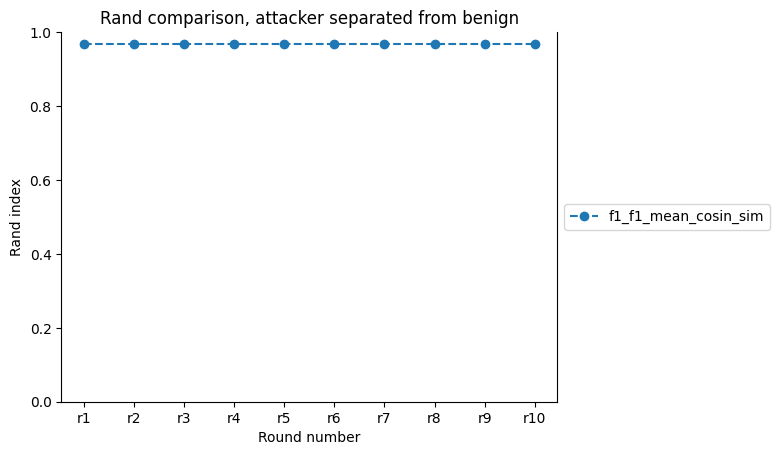

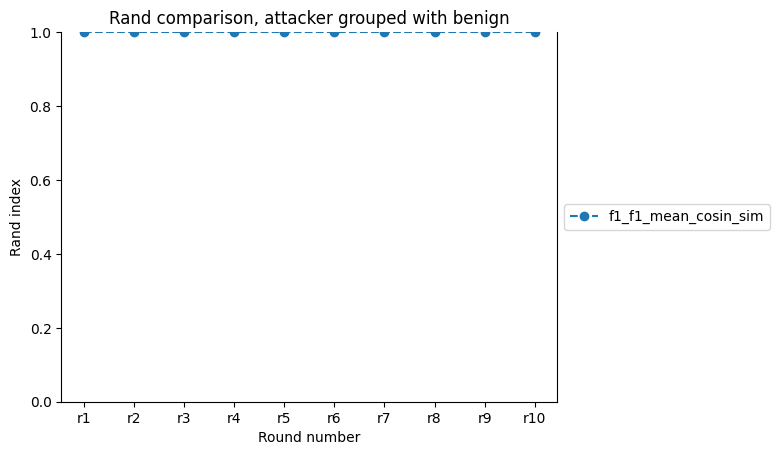

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.1", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.1", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 40% poisonning

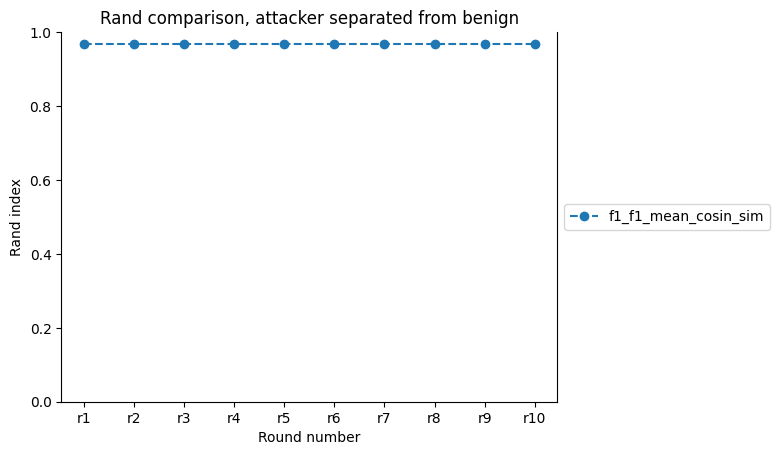

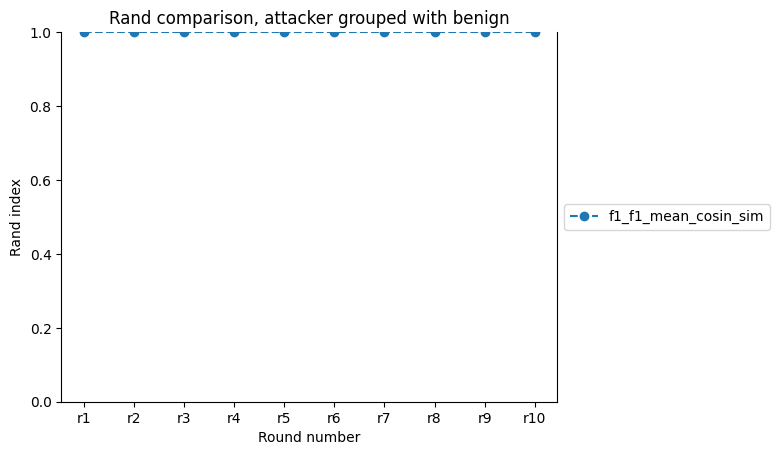

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.4", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.4", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 60% poisonning

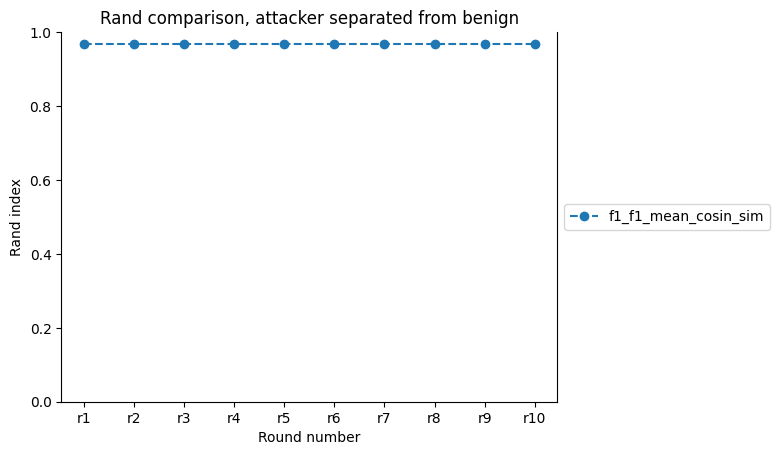

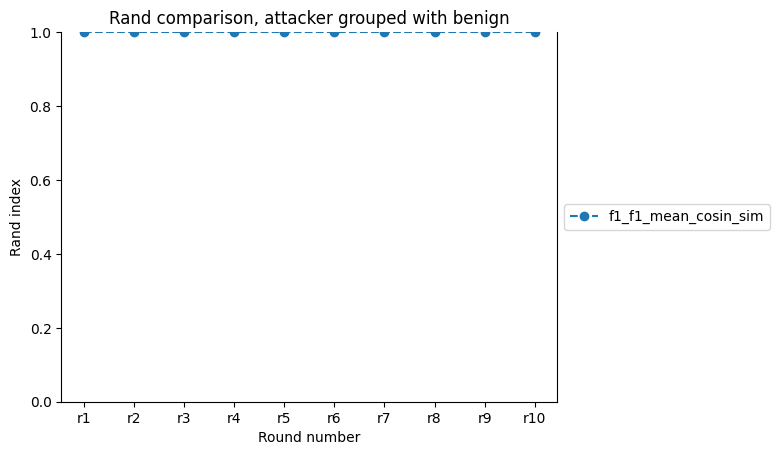

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.6", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.6", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 80% poisonning

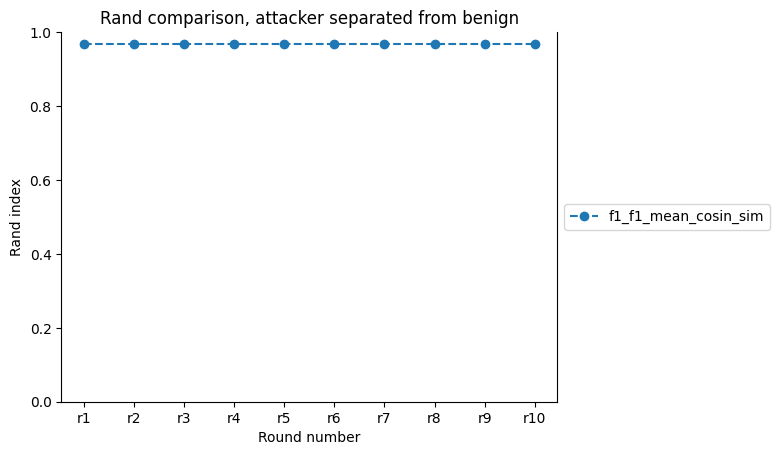

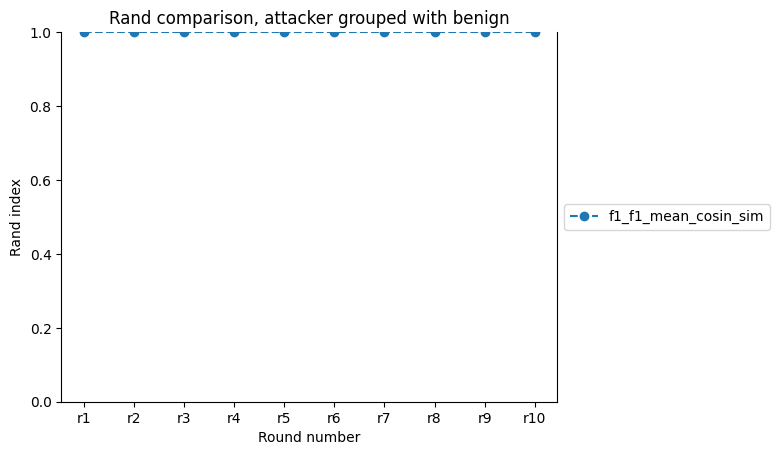

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.8", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.8", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 95% poisonning

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.95", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/0.95", title="Rand comparison, attacker grouped with benign",split_attacker=False)

#### 100% poisonning

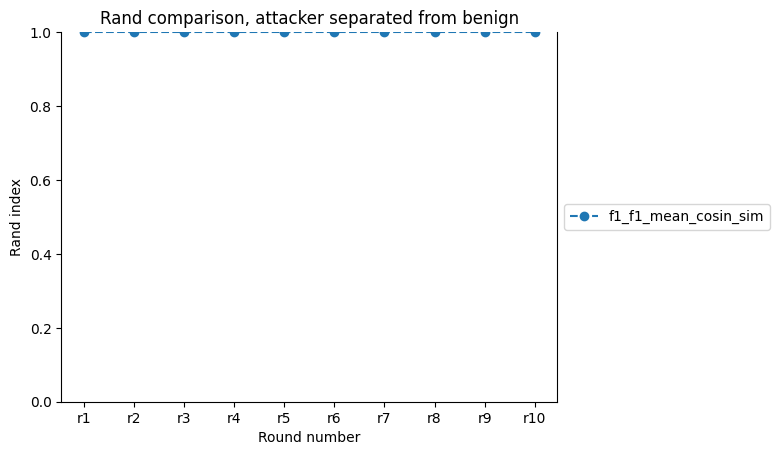

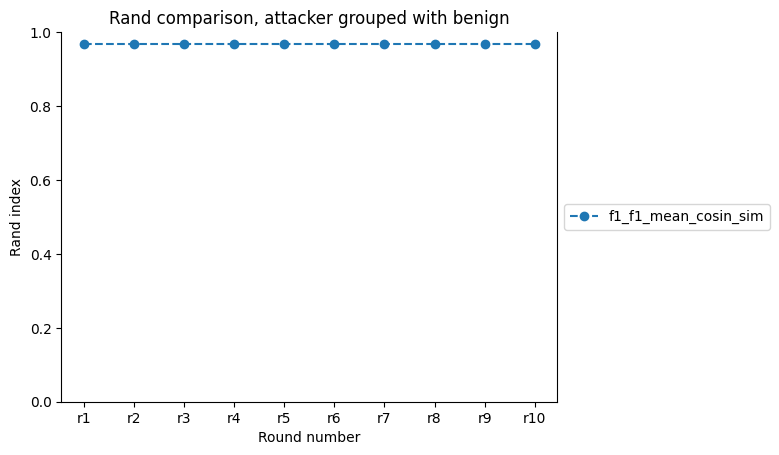

In [ ]:
plot_rand_comparison("./clustering/untargeted_effect/sybils/1.0", title="Rand comparison, attacker separated from benign",split_attacker=True)
plot_rand_comparison("./clustering/untargeted_effect/sybils/1.0", title="Rand comparison, attacker grouped with benign",split_attacker=False)

## Fixed distance


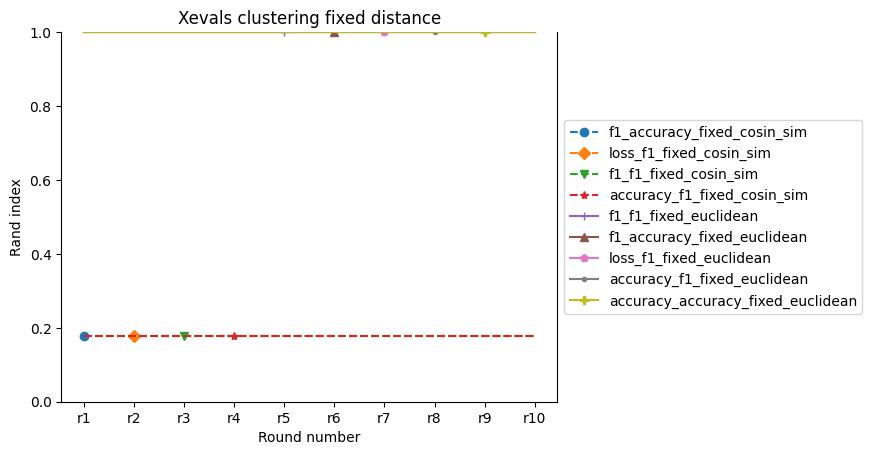

In [ ]:
plot_rand_comparison("./clustering/fix/cosin_sim","./clustering/fix/euclidean" , title="Xevals clustering fixed distance", multirun=True)

#### Fixed distance cosin_sim 

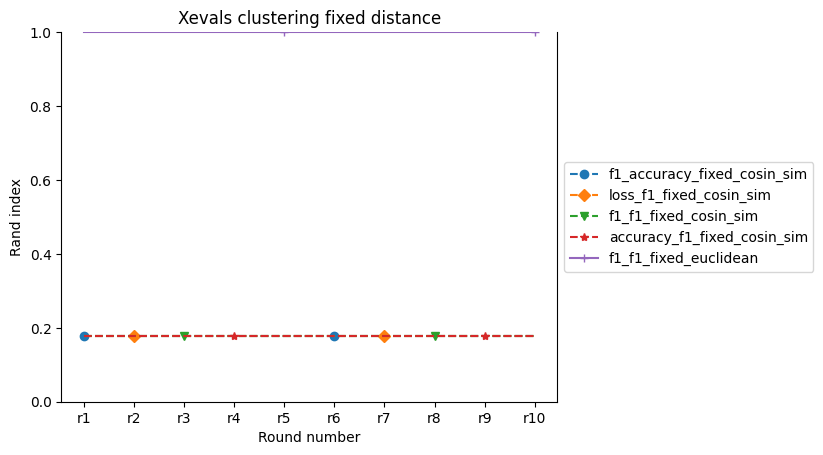

In [ ]:
plot_rand_comparison("./clustering/fix/cosin_sim" , title="Xevals clustering fixed distance", multirun=True)

### Fixed distance euclidean 

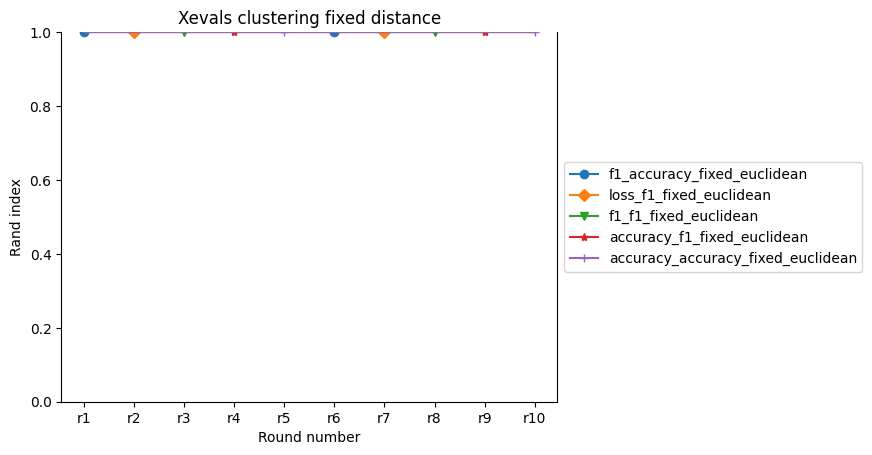

In [ ]:
plot_rand_comparison("./clustering/fix/euclidean" , title="Xevals clustering fixed distance", multirun=True)

In [ ]:
# X_f1_models = ["../multirun/2023-05-17/16-20-07/00","../multirun/2023-05-17/16-20-07/06","../multirun/2023-05-17/16-20-07/12"]
X_f1_xevals = ["../multirun/2023-06-01/17-18-09/0","../multirun/2023-05-31/16-56-37/0","../multirun/2023-05-31/16-56-37/1","../multirun/2023-05-31/16-56-37/2","../multirun/2023-05-31/16-56-37/3","../outputs/2023-06-01"]
# X_acc_models = ["../multirun/2023-05-17/16-20-07/04","../multirun/2023-05-17/16-20-07/10","../multirun/2023-05-17/16-20-07/16"]
X_acc_xevals = ["../multirun/2023-06-01/17-18-09/1","../multirun/2023-05-17/16-20-07/11","../multirun/2023-05-17/16-20-07/17"]

# plot_rand_comparison(*X_f1_models, out_path="clustering/tests/models/metrics_f1.png" , title="F1 for reputation with models")
plot_rand_comparison("../multirun/2023-05-17/16-20-07/01","../multirun/2023-05-17/16-20-07/07","../multirun/2023-05-17/16-20-07/13" , title="F1 for reputation with xevals")
# plot_rand_comparison(*X_acc_models, out_path="clustering/tests/models/metrics_acc.png" , title="Acc for reputation with models")
plot_rand_comparison(*X_acc_xevals , title="Acc for reputation with xevals")

ValueError: Path ../multirun/2023-05-17/16-20-07/01 does not exist

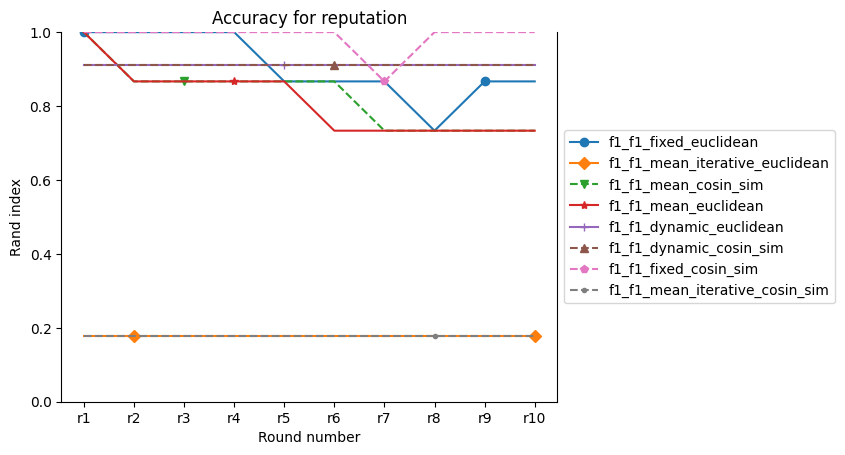

In [ ]:
plot_rand_comparison("../multirun/2023-05-24/23-28-11/",title="Accuracy for reputation", multirun=True)

FileNotFoundError: [Errno 2] No such file or directory: 'clustering/tests/metrics_acc.png'

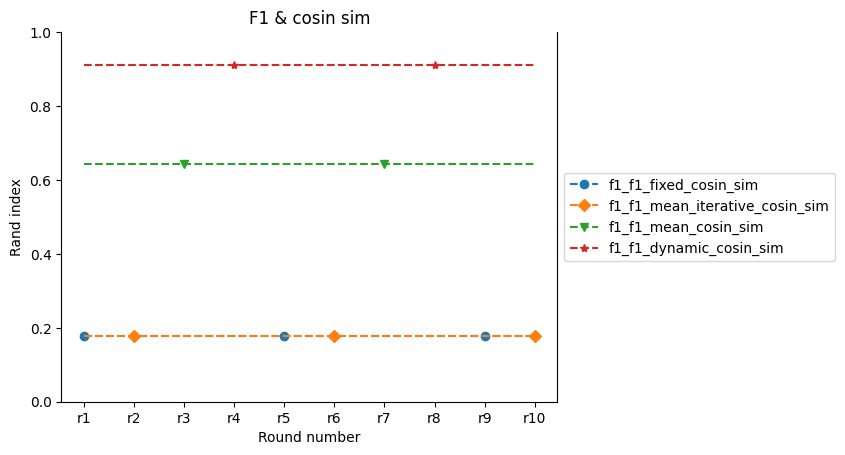

In [ ]:
plot_rand_comparison("../multirun/2023-05-31/16-56-37", out_path="clustering/tests/metrics_acc.png" ,title="F1 & cosin sim", multirun=True)

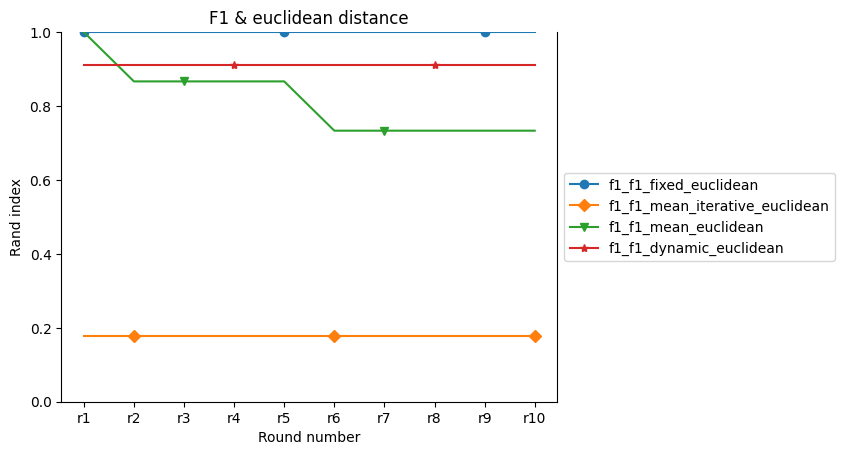

In [ ]:
plot_rand_comparison("../multirun/2023-05-30/15-50-22", out_path="clustering/tests/metrics_acc.png" ,title="F1 & euclidean distance", multirun=True)

## Acc metric comparison


In [ ]:
# Pas de run avec la loss pour reputation pour l'instant.
# plot_rand_comparison("trustfids/acc_loss/","trustfids/f1_loss/","trustfids/loss_loss/", title="Loss for reputation")

#### Metric used by reputation have an impact on clustering
Plotted bellow : metrics for reputation vary, clustering stays constant. 

**Main takeaway :**
- The clustering show small variations depending on the metric used for reputation.
- No impact from the reputation metric would mean that the three curve overlap each others. 

**Open questions :** 
- Test with loss on reputation ? 


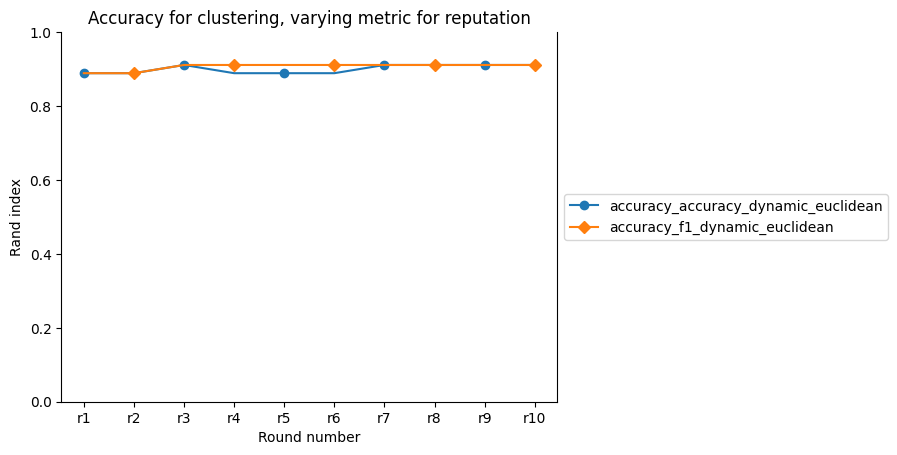

In [ ]:
plot_rand_comparison("./clustering/dynamic/euclidean/acc_acc","./clustering/dynamic/euclidean/acc_f1", title="Accuracy for clustering, varying metric for reputation")

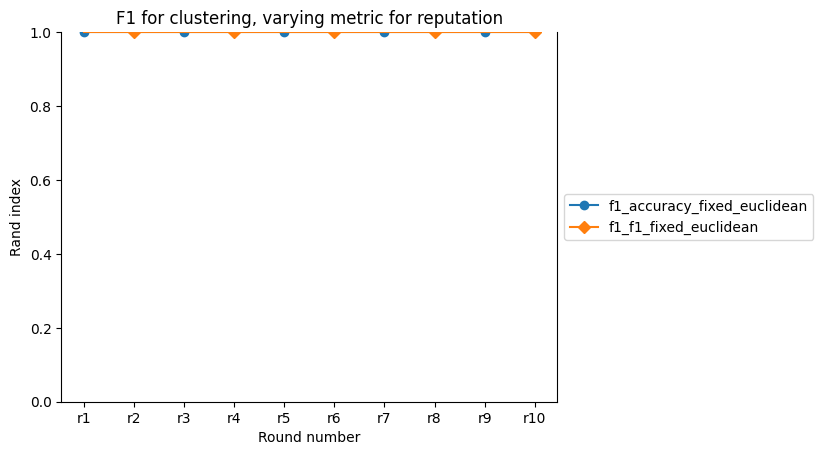

In [ ]:
plot_rand_comparison("./clustering/fix/euclidean/f1_acc","./clustering/fix/euclidean/f1_f1", title="F1 for clustering, varying metric for reputation")

In [ ]:
# plot_rand_comparison("trustfids/loss_acc/","trustfids/loss_f1/", title="Loss for clustering, varying metric for reputation")

## Model vs xevals comparison 

## Attaque 
TODO : intégrer les scénarios d'attaques à la nomenclature de nommage ? 
TODO : re-run les tests avec le placement des clées nécessaire au plot des graphes.

In [ ]:
# plot_rand_comparison("baselines/benign/trustfids/",title="benign")
# plot_rand_comparison("baselines/lone_targeted/trustfids/",title="lone_targeted")
# plot_rand_comparison("baselines/lone_untargeted/trustfids/",title="lone_untargeted")
# plot_rand_comparison("baselines/sybil_targeted/trustfids/",title="sybil_targeted")
# plot_rand_comparison("baselines/sybil_untargeted/trustfids/",title="sybil_untargeted")


## Find the right $alpha$ for fixed clustering
Parse different $alpha$ with small step with fix threshold in hierarchical clustering and plot the number of clusters. 

Rationale : 
- In our case the number of clusters is a good simple indicator of the clustering quality, all cluster participants tend to be merged together. In case they are separated they are usually splitted. 
- The cross evaluation results will be impacted by the clustering results, when fine tunning an already good clustering however this change is marginal, exploring option based on pre-computed x-evals is much faster compared to running the whole chain every time. 

#### Accuracy

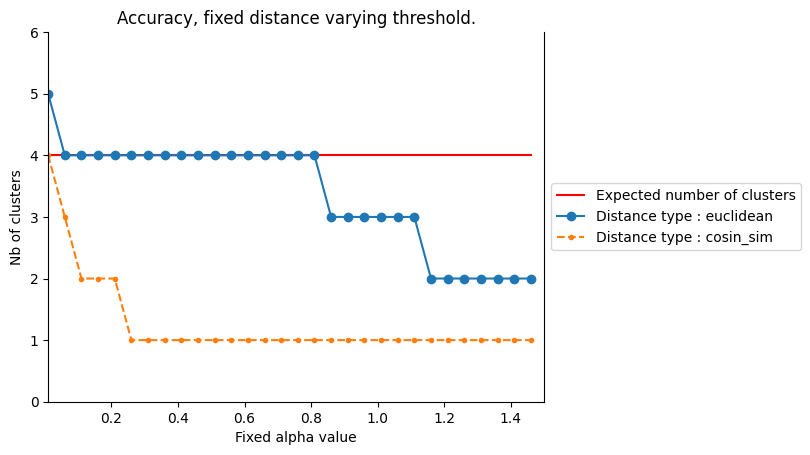

In [ ]:
plot_multiple_threshold("./clustering/fix/euclidean/acc_acc",0.01,1.5,0.05, "Accuracy, fixed distance varying threshold.")

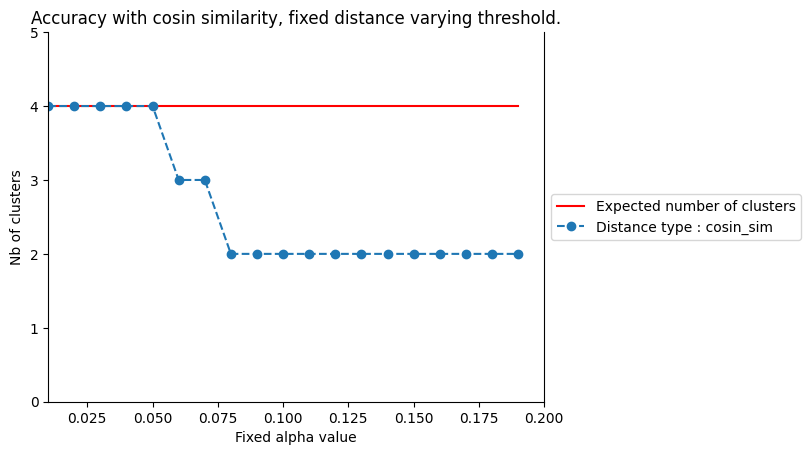

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_multiple_threshold("./clustering/fix/euclidean/acc_acc",0.01,0.2,0.01, "Accuracy with cosin similarity, fixed distance varying threshold.",["cosin_sim"])

### F1 score 

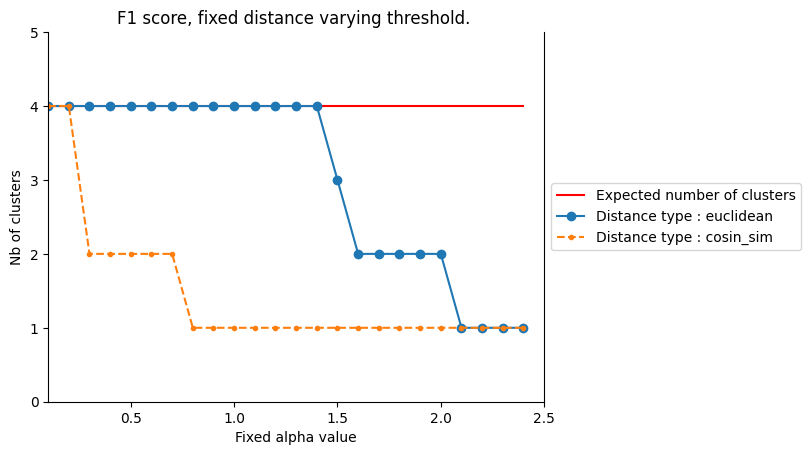

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_multiple_threshold("./clustering/fix/euclidean/f1_f1",0.01,0.8,0.025, "F1 with cosin similarity, fixed distance varying threshold.",["cosin_sim"])

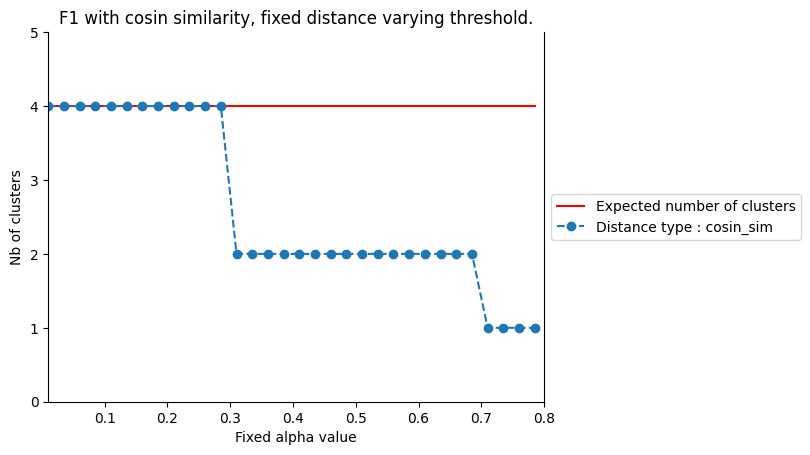

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_multiple_threshold("./clustering/fix/euclidean/f1_f1",0.01,0.8,0.025, "F1 with cosin similarity, fixed distance varying threshold.",["cosin_sim"])

### Loss

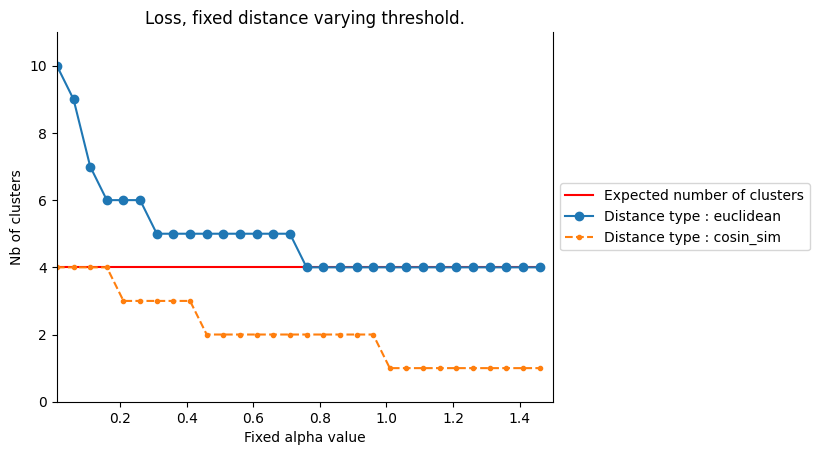

In [ ]:
plot_multiple_threshold(p,0.01,1.5,0.05, "Loss, fixed distance varying threshold.")

## Multi-run quarter of mean distance 

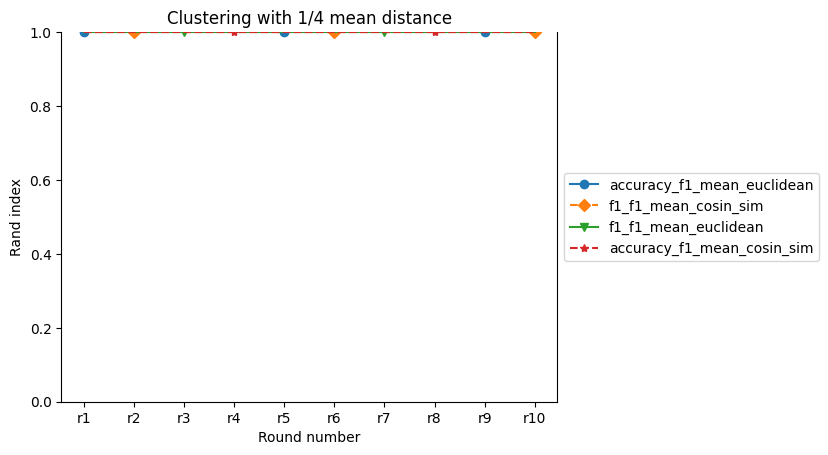

In [ ]:

plot_rand_comparison("../multirun/2023-06-16/11-47-36", title="Clustering with 1/4 mean distance", multirun=True)

## 2d projection evaluations / distance

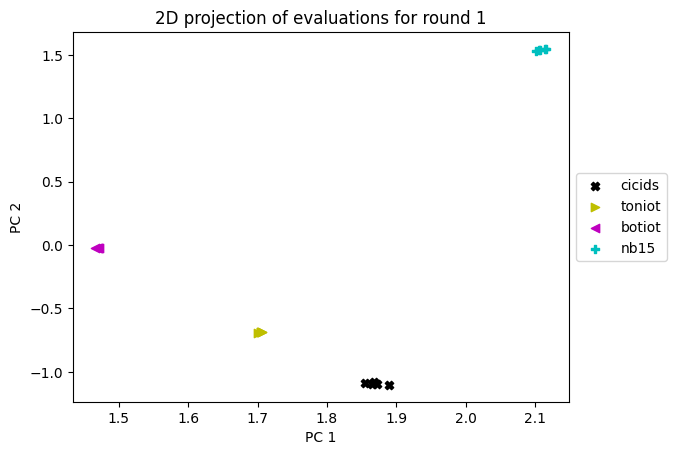

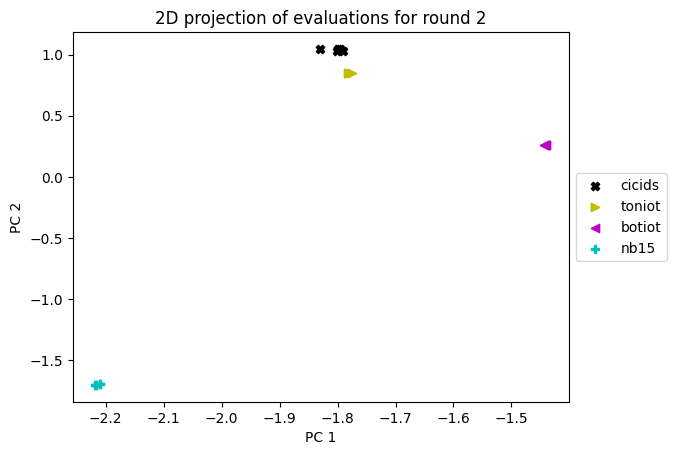

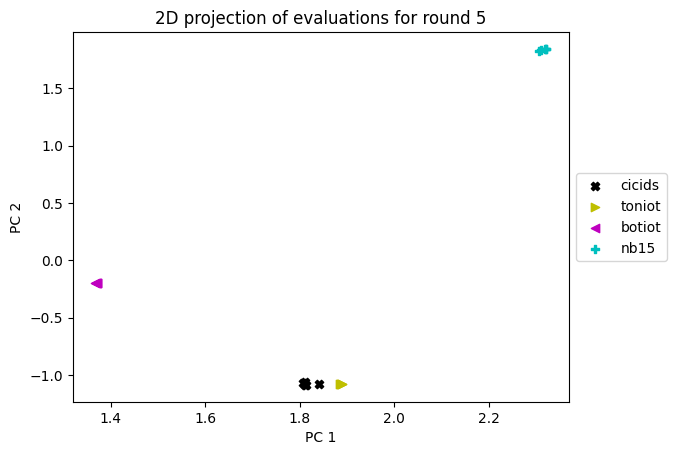

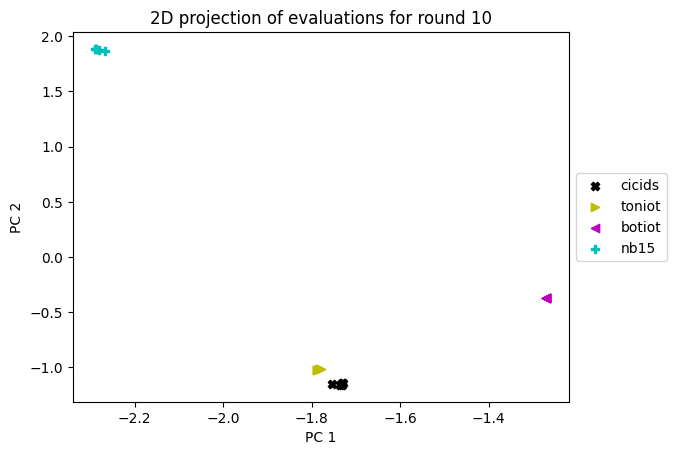

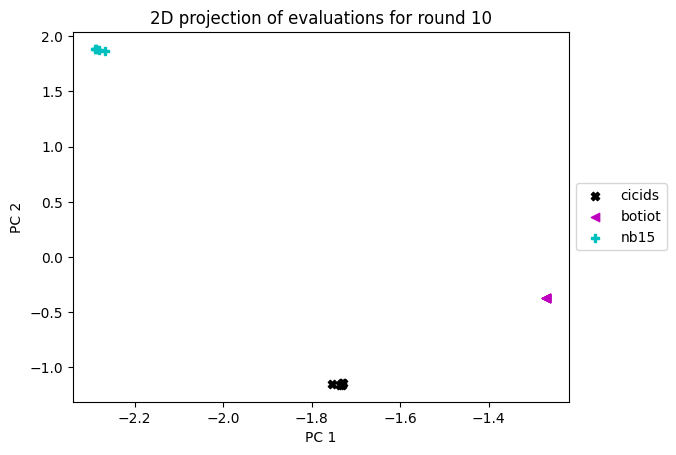

In [ ]:
from trustfids.utils.plot_cluster import plot_evals_2D
# p = "../multirun/2023-06-20/00-46-49/archi=trustfids,scenario_attacker=loud,scenario_distribution=sybils/"
# p = "../multirun/2023-06-20/00-46-49/archi=trustfids,scenario_attacker=redemption,scenario_distribution=sybils"
p = "../multirun/2023-06-20/00-46-49/archi=trustfids,scenario_attacker=increment,scenario_distribution=benign"

plot_evals_2D(p, round=1)

plot_evals_2D(p, round=2)

plot_evals_2D(p, round=5)

plot_evals_2D(p)

plot_evals_2D(p,removed_data_set=["toniot"])